In [1]:
import torch
from models import Generator, Discriminator
import matplotlib.pyplot as plt
import os
import torchvision.utils as vutils
import numpy as np
from pathlib import Path
from PIL import Image

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the trained models
G_state_dict = torch.load("models/G_augmented.pt")
D_state_dict = torch.load("models/D_augmented.pt")
G = Generator().to(DEVICE)
D = Discriminator().to(DEVICE)
G.load_state_dict(G_state_dict)
D.load_state_dict(D_state_dict)

<All keys matched successfully>

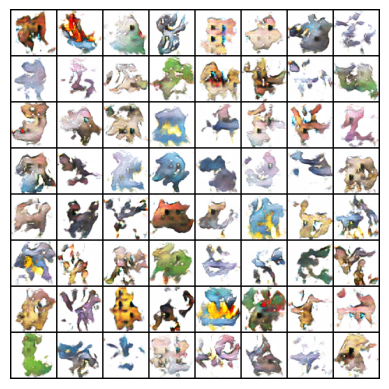

In [2]:
n_pokemon = len(os.listdir("pokemon_images/pokemon_jpg"))
latent_dim = 100
noise = torch.randn(n_pokemon, latent_dim, 1, 1).to(DEVICE)
fake = G(noise).detach().cpu()
# Visualize first 64 fake images
img_grid = vutils.make_grid(fake[:64], padding=2, normalize=True)
plt.imshow(np.transpose(img_grid, (1, 2, 0)))
plt.axis("off")
plt.show()

In [3]:
# Save all generated images to a folder
save_dir_64 = Path("generated_images/img_size_64")
save_dir_64.mkdir(parents=True, exist_ok=True)
save_dir_256 = Path("generated_images/img_size_256")
save_dir_256.mkdir(parents=True, exist_ok=True)
for i in range(n_pokemon):
    fake_img = fake[i].numpy()
    # Change fake_img from -1 to 1 to 0 to 1
    fake_img = (fake_img + 1) / 2
    img = np.transpose(fake_img, (1, 2, 0))
    plt.imsave(f"{save_dir_64}/pokemon_{i}.jpg", img)
    pil_img = Image.fromarray((img * 255).astype(np.uint8))
    img_256 = pil_img.resize((256, 256))
    # Normalize img_256 to 0-1
    img_256 = np.array(img_256) / 255
    plt.imsave(f"{save_dir_256}/pokemon_{i}.jpg", img_256)

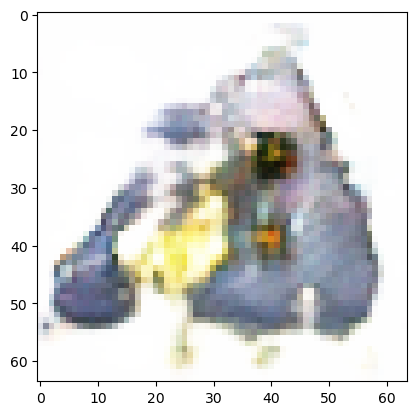

In [4]:
plt.imshow(img)
plt.show()

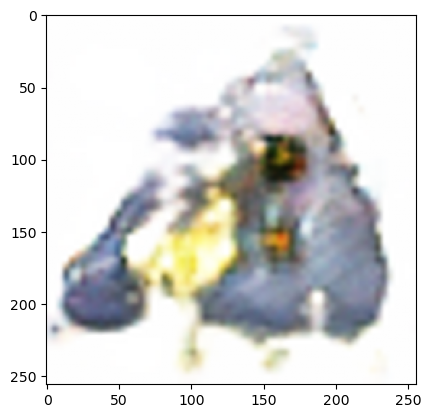

In [5]:
plt.imshow(img_256)
plt.show()

To run the followig cell first install the `pytorch-fid` package:

`pip install pytorch-fid`

Also need to install scipy 1.11.1:

`pip install scipy==1.11.1`

In [6]:
# First test FID on same dataset (should be close to 0)
# If you don't have a GPU remove --device cuda:0
!python -m pytorch_fid pokemon_images/pokemon_jpg/ pokemon_images/pokemon_jpg/ --device cuda:0

100%|███████████████████████████████████████████| 17/17 [00:02<00:00,  7.36it/s]
FID:  -2.880909499936024e-05


In [7]:
# FID on generated images with size 64
!python -m pytorch_fid pokemon_images/pokemon_jpg/ generated_images/img_size_64/ --device cuda:0

100%|███████████████████████████████████████████| 17/17 [00:02<00:00,  8.20it/s]
FID:  269.7496476661294


In [8]:
# FID on generated images with size 256
!python -m pytorch_fid pokemon_images/pokemon_jpg/ generated_images/img_size_256/ --device cuda:0

100%|███████████████████████████████████████████| 17/17 [00:02<00:00,  7.72it/s]
FID:  234.1945679715218
